# Vocab Analysis
## Section 3: Analyze the Data

### 1. Import necessary libraries

In [58]:
# %load da_vocab_utility.py
# TDD backbone assertion to confirm a function call returns the desired result
def assertEquals(actual, expected, desc):
    assert(actual==expected), desc + " result: " + str(actual) + ", expected: " + str(expected)
    return "OK"
	
# check that two lists have the same contents
def lists_equal(a,b):
    return (a == b).all()
	

# shallow check (by row) for duplicates
def has_dupes(df_in):
    dupe = df_in.duplicated()
    return df_in.loc[dupe].shape[0] != 0
	
def print_line_break():
    print("-"*75)
	
def print_before_after(b, a, t=""):
    if t != "":
        print_line_break()
        print(t)
    print_line_break()
    print("Before: " + str(b))
    print_line_break()
    print("After: " + str(a))
    print_line_break()
	
def time_it(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    # https://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python
    print("{:.0f}".format((end - start)*1000) + " miliseconds")
	
def has_dupe_terms(df_in):
    location = df_in['Term'].duplicated()
    return df_in.loc[location].shape[0] != 0
	
def get_rows_by_value_in_col(df_in, value, col):
    return df_in.loc[df_in[col]==value]
	
# Converts a tag string to a list to a set back to a string (this removes the duplicates)
def remove_dupes(t):
    temp = list(set(t.lower().split()))
    return ' '.join(temp) # return as string
	
# determines if an individual tag substring exists in a larger tags list string
def tag_exists(tags, tag):
    return 1 if tag in tags.split() else 0
	
def is_blank (s):
    return not (s and s.strip())
	
def get_frame_of_cards_by_term(df, t):
    return df.loc[df['Term']==t]
	

In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [60]:
# show all columns
pd.options.display.max_columns = None

In [61]:
image_cnt = 0

In [62]:
def save_fig_a(x):
    plt.savefig("analyze_" + str(x)+".png")

### 2. Import necessary datasets

In [63]:
# https://stackoverflow.com/questions/36977223/how-should-i-read-a-csv-file-without-the-unnamed-row-with-pandas?noredirect=1&lq=1
# import notes
notes_location = "datasets/df_notes_020_final_section_2.csv"
df_notes = pd.read_csv(notes_location, index_col=[0])

# import cards
cards_location = "datasets/df_cards_012_mid_section_2.csv"
df_cards = pd.read_csv(cards_location, index_col=[0])

# todo: import revlog

In [64]:
df_notes.head()

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste,analysis_cat
9,1331799797126,fromdict kanji,有能,ゆうのう,2012-03-15 08:23:17.126,2019-05-18 14:33:12.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,4,[2],[3:4],NaN,kanji,248.0,2130.0,9.0,0.0,9,0,0,0,1,0,0.000000,27.555556,2,2,0,2,1,NaN
12,1331799797128,fromdict kanji,送り賃,おくりちん,2012-03-15 08:23:17.128,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,[3:4],[5:8],NaN,kanji,178.0,2120.0,8.0,0.0,8,0,0,0,1,0,0.000000,22.250000,1,2,0,2,1,NaN
14,1331799797131,fromdict kanji,文明開化,ぶんめいかいか,2012-03-15 08:23:17.131,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,[3:4],[5:8],NaN,kanji,202.0,2120.0,8.0,0.0,8,0,0,0,1,0,0.000000,25.250000,1,2,0,2,1,NaN
15,1331799797132,fromdict kanji,抽象的,ちゅうしょうてき,2012-03-15 08:23:17.132,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,8,[3:4],[5:8],NaN,kanji,98.0,1920.0,19.0,1.0,19,1,0,0,1,0,0.052632,5.157895,0,1,0,0,0,NaN
17,1331799797135,fromdict kanji,現実的,げんじつてき,2012-03-15 08:23:17.135,2019-05-18 12:54:16.000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6,[3:4],[5:8],NaN,kanji,413.0,2420.0,9.0,0.0,9,0,0,0,1,0,0.000000,45.888889,3,2,0,3,1,NaN


In [65]:
print(df_notes.TermLenGroup.unique())
print(df_notes.SyllablesGroup.unique())
print(df_notes.script.unique())
print(df_notes.analysis_cat.unique())

['[2]' '[3:4]' '[1]' '[5:8]' '[9: ]']
['[3:4]' '[5:8]' '[2]' '[9: ]' '[1]']
['kanji' 'katakana' 'hiragana' nan]
[nan 'slippery' 'sticky']


In [66]:
df_cards.head()

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi,c_suff_reviewed
3,1331799797114,1331799797114,99,1980,7,0,2012-03-15 08:23:17.114,2015-02-04 09:00:00.000,0,1,0,0,1,0,read,0.142857,14.142857,1.0
8,1331799797122,1331799797122,224,2130,5,0,2012-03-15 08:23:17.122,2015-07-04 09:00:00.000,2,2,0,0,1,0,read,0.200000,44.800000,1.0
9,1331799797125,1331799797125,291,1930,18,1,2012-03-15 08:23:17.125,2016-01-30 09:00:00.000,2,1,0,0,1,0,read,0.111111,16.166667,1.0
10,1331799797126,1331799797126,248,2130,9,0,2012-03-15 08:23:17.126,2015-09-04 09:00:00.000,2,2,0,0,1,0,read,0.111111,27.555556,1.0
11,1331799797127,1331799797127,229,2270,9,0,2012-03-15 08:23:17.127,2015-06-11 09:00:00.000,2,2,0,0,1,0,read,0.111111,25.444444,1.0


### 3. Observe Metadata (tag) Frequency:

In [67]:
tag_freq = pd.Series(' '.join(df_notes.tags).split()).value_counts()

In [68]:
tag_freq.head(20)

kanji                   3791
textbook                1663
fromdict                1213
metalite                1008
fromtest                 830
verb                     828
hasrobo                  424
commonword               337
fromexam                 295
hiragana                 239
noun                     239
addsimilar               193
numeric                  191
checked                  181
n3                       181
college                  168
media                    166
katakana                 165
usuallywritteninkana     160
convo                    144
dtype: int64

In [69]:
tag_freq.head(60)[20:]

transitive      137
lyrics          121
intransitive    104
counter         100
iadj             92
adj              92
semester1        90
n4               85
multimeaning     78
technical        75
place            73
n2               72
n5               69
hassame          66
n1               62
multireading     56
body             49
type5r           48
name             44
adv              42
haskanji         40
animal           40
noadjective      38
suruverb         36
gairaigo         36
people           35
ghibli           32
food             32
magazine         32
multiterm        30
multiwriting     30
culture          29
inspect          27
onomatopoeic     26
abbr             24
hassimilar       24
naadjective      24
suffix           24
mergeterms       22
funny            21
dtype: int64

In [70]:
# Inspect tags that have been used only sparingly
tag_freq.tail(30)

conjunction                1
seafood                    1
verbsinfinitive3           1
verbscompoundpast          1
shinto                     1
position                   1
haskatakana                1
grammarcontext             1
hair                       1
multiintonation            1
fish                       1
japan                      1
fromyoga                   1
challenging                1
agriculture                1
tradition                  1
nounsuffix                 1
dailylife                  1
spices                     1
nonnativeaudio             1
pronoun                    1
checksimilar               1
hasabbrev                  1
firstencounteredinjapan    1
location                   1
fromschool                 1
demonstrative              1
profession                 1
mixedscript                1
verbs3                     1
dtype: int64

# Initial Observations

Looks like our data is ready for some proper inspection! What are some questions that we might ask of this dataset? We could start with some simple/basic broad/overview observations about the (condensed) dataset such as:
- How many terms (unique notes) exist?
- How many study vectors (unique card types) exist (were utilized by student A)?
- When did student A first start studying?
- What is the data distribution for reps count? For laspes count?
- Of the terms that exist, how many had audio data?
- Of the terms that exist, how many had image data?

In [71]:
# unique terms in the condensed dataset
len(df_notes['Term'].unique())

5248

In [72]:
# confirm what card types exist
df_cards['cardtype'].value_counts()

read      6214
look       715
listen       8
recall       4
Name: cardtype, dtype: int64

In [73]:
#pd_crt # datetime of collection creation (studying commenced from this date)

In [74]:
print(df_cards.shape)

(6941, 18)


In [75]:
print(df_notes.shape)

(5248, 64)


# Define features

In [76]:
#components of binary list (cards)
type_list = ['CardType_listen','CardType_look','CardType_read','CardType_recall']

In [77]:
#components of binary list (notes, combo)
genre_list = ['clothing','animal','body','food','place']

source_list = ['fromdict','fromexam','textbook','college']

convo_list = ['convo','nonconvo']

jlpt_list = ['n1','n2','n3','n4','n5']

pos_list = ['noun','verb','adj','adv']

char_list = ['katakana','hiragana','kanji']

has_list = ['hasVisual','hasAudio','hasMultiMeaning','hasMultiReading','hasSimilarSound','hasSameSound',
    'hasSimilarMeaning','hasAltForm','hasRichExamples']

card_list = ['hasListenCard','hasPictureCard','hasReadCard','hasTranslateCard']

other_list = ['commonword','metalite']

In [78]:
#components of continuous list
len_list = ['TermLen','Syllables']

study_data_list = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                   'total_reps','total_lapses']

In [79]:
binary_list = list(genre_list + source_list + jlpt_list +
    pos_list + char_list + has_list + other_list + convo_list) #card_list

continuous_list = list(len_list + study_data_list)

discrete_non_binary_list = ['NoteCreated','LastModified','TermLenGroup','SyllablesGroup','jlpt_lvl_d']

In [80]:
numeric_note_fields = ['mean_ivl','mean_factor','mean_reps','mean_lapses',
                       'total_reps','total_lapses']

mean_card_fields = ['mean_card_waste','mean_card_roi']

In [81]:
note_quintiles = ['n_ivl_q','n_factor_q','n_waste_q','n_roi_q']

In [82]:
#show correlation of stats via heatmap
df_cards_001_corr = df_cards.copy()
df_cards_001_corr = df_cards_001_corr.drop(["cid","nid",'c_ivl_q','c_factor_q','ivl','factor','reps','lapses'], axis=1)

# Inspect card correlations visually

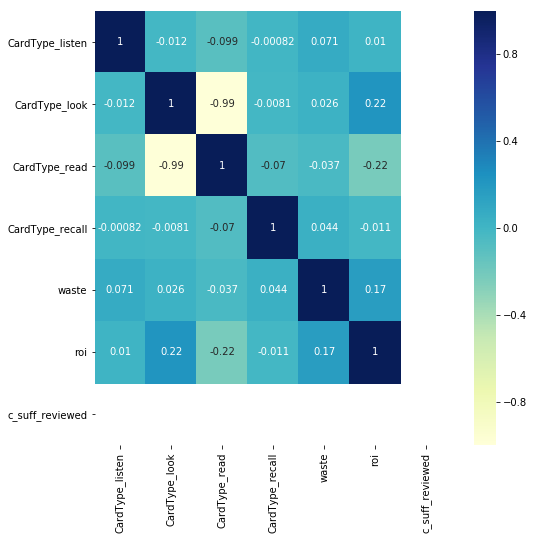

In [83]:
corr_card = df_cards_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax_card = sns.heatmap(corr_card, vmin=-1, cmap="YlGnBu", annot=True)
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

# Inspect note correlations visually

In [84]:
#show correlation of stats via heatmap
df_notes_001_corr = df_notes.copy()
df_notes_001_corr = df_notes_001_corr.drop(list(
    ["nid",'jlpt_lvl_d','no_waste'] +
    card_list + convo_list + numeric_note_fields + genre_list + 
    source_list + jlpt_list + char_list + has_list + 
    other_list + len_list + note_quintiles), axis=1)

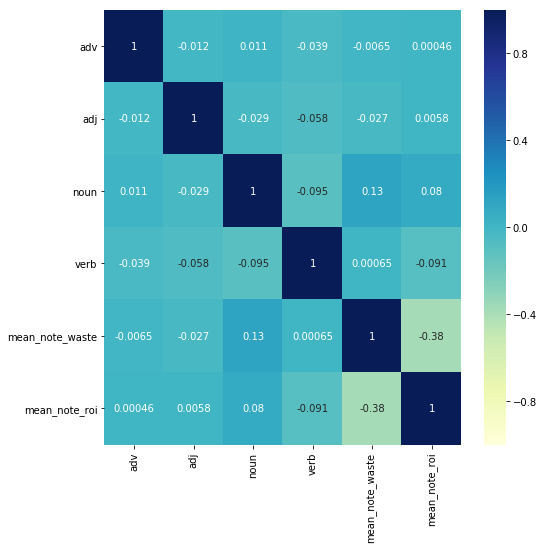

In [85]:
# Inspect the correlation between word type & mean note ROI & mean note waste
corr = df_notes_001_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [86]:
df_notes_002_corr = df_notes.copy()
df_notes_002_corr = df_notes_002_corr.drop(list(
    ["nid","total_reps","total_lapses",'no_waste'] + 
    numeric_note_fields + source_list + convo_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles + ['jlpt_lvl_d','mean_factor']), axis=1)

# Inspect correlations by script

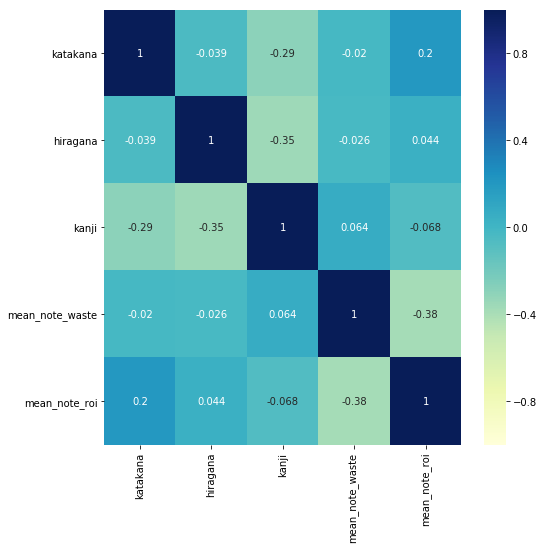

In [87]:
#show correlation of stats via heatmap
corr2 = df_notes_002_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax2 = sns.heatmap(corr2, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [88]:
df_notes_003_corr = df_notes.copy()
df_notes_003_corr = df_notes_003_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor','no_waste'] + 
    numeric_note_fields + convo_list + char_list + pos_list + len_list + other_list + 
    has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlations by word first encounter

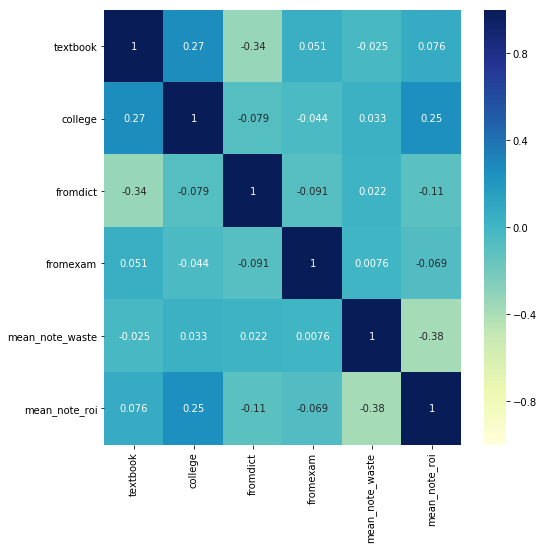

In [89]:
#show correlation of stats via heatmap
corr3 = df_notes_003_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax3 = sns.heatmap(corr3, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [90]:
df_notes_004_corr = df_notes.copy()
df_notes_004_corr = df_notes_004_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'commonword','no_waste'] + numeric_note_fields + char_list + source_list + 
    pos_list + len_list + has_list + genre_list + jlpt_list + card_list + note_quintiles), axis=1)

# Inspect correlation of convo ok'd vs not, & metadata poorness

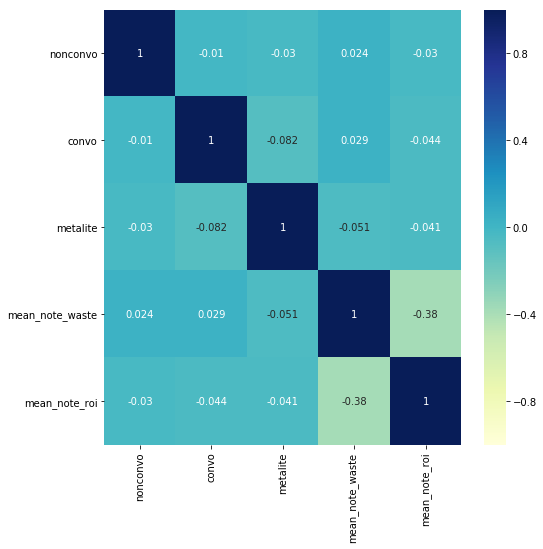

In [91]:
#show correlation of stats via heatmap
corr4 = df_notes_004_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax4 = sns.heatmap(corr4, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

# Inspect field data correlations

In [92]:
df_notes_005_corr = df_notes.copy()
df_notes_005_corr = df_notes_005_corr.drop(list(
    ["nid","total_reps","total_lapses",'jlpt_lvl_d','mean_factor',
     'metalite','no_waste']+other_list+convo_list+char_list+numeric_note_fields+
    source_list+pos_list+len_list+genre_list+jlpt_list+card_list + note_quintiles), axis=1)

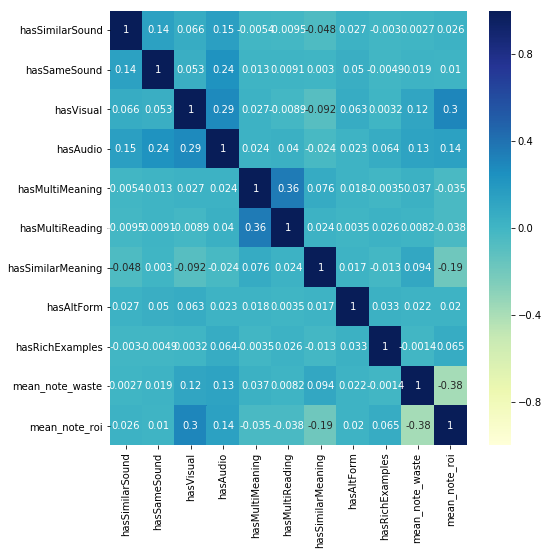

In [93]:
#show correlation of stats via heatmap
corr5 = df_notes_005_corr.corr()
fig, ax = plt.subplots(figsize=(8,8))
ax5 = sns.heatmap(corr5, vmin=-1, cmap="YlGnBu", annot=True)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1

In [94]:
df_cards_002_describe = df_cards.copy()
df_cards_002_describe = df_cards_002_describe.drop(list(["cid","nid",'c_ivl_q','c_factor_q']+type_list), axis=1)

df_cards_002_describe.describe()

,ivl,factor,reps,lapses,waste,roi,c_suff_reviewed
count,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.000000,6941.0
mean,319.762570,1720.476012,15.737070,0.611583,0.105331,27.500883,1.0
std,248.757433,387.113479,9.108861,1.183510,0.035168,24.047720,0.0
min,1.000000,1300.000000,5.000000,0.000000,0.033333,0.008850,1.0
25%,166.000000,1300.000000,10.000000,0.000000,0.076923,9.958333,1.0
50%,239.000000,1677.000000,13.000000,0.000000,0.100000,19.714286,1.0
75%,408.000000,2050.000000,19.000000,1.000000,0.125000,38.500000,1.0
max,1732.000000,2710.000000,113.000000,16.000000,0.210526,108.833333,1.0


In [95]:
df_cards_002_describe.corr()

,ivl,factor,reps,lapses,waste,roi,c_suff_reviewed
ivl,1.000000,0.294061,-0.232349,-0.255285,-0.110885,0.829343,NaN
factor,0.294061,1.000000,-0.652400,-0.401834,0.479478,0.626292,NaN
reps,-0.232349,-0.652400,1.000000,0.863238,-0.143671,-0.516039,NaN
lapses,-0.255285,-0.401834,0.863238,1.000000,0.312028,-0.407954,NaN
waste,-0.110885,0.479478,-0.143671,0.312028,1.000000,0.167019,NaN
roi,0.829343,0.626292,-0.516039,-0.407954,0.167019,1.000000,NaN
c_suff_reviewed,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot ROI trends for cards using linear regression

In [96]:
import numpy as np
import statsmodels.formula.api as smf

In [97]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('roi ~ ivl + factor - 1', data=df_cards).fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roi   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                 2.520e+04
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:38:41   Log-Likelihood:                -27495.
No. Observations:                6941   AIC:                         5.499e+04
Df Residuals:                    6939   BIC:                         5.501e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ivl            0.0685      0.001    106.675      0.000       0.067       0.070
factor         0.0044      0.000     29.553      0.000       0.004       0.005
==============================================================================
Omnibus:                     1799.724   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6205.723
Skew:                           1.284   Prob(JB):                         0.00
Kurtosis:                       6.855   Cond. No.                         7.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression (using everything)

In [99]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen + mean_reps + total_reps - 1', data=df_notes).fit()

In [100]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     1646.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:38:42   Log-Likelihood:                -23532.
No. Observations:                5248   AIC:                         4.707e+04
Df Residuals:                    5244   BIC:                         4.710e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Syllables      2.0606      0.227      9.083      0.000       1.616       2.505
TermLen        6.2454      0.339     18.449      0.000       5.582       6.909
mean_reps     -1.1679      0.058    -20.003      0.000      -1.282      -1.053
total_reps     0.7965      0.044     18.101      0.000       0.710       0.883
==============================================================================
Omnibus:                      679.799   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1393.657
Skew:                           0.801   Prob(JB):                    2.35e-303
Kurtosis:                       4.952   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot ROI trends for notes using linear regression

In [101]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_roi ~ Syllables + TermLen - 1', data=df_notes).fit()

In [102]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mean_note_roi   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     2872.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:38:42   Log-Likelihood:                -23726.
No. Observations:                5248   AIC:                         4.746e+04
Df Residuals:                    5246   BIC:                         4.747e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Syllables      1.4843      0.222      6.690      0.000       1.049       1.919
TermLen        5.8570      0.350     16.754      0.000       5.172       6.542
==============================================================================
Omnibus:                      847.758   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1464.857
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       4.511   Cond. No.                         7.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plot waste trends for notes using linear regression

In [103]:
#OLS is Ordinary Least Squares, the most common type of linear regression
#the fit function uses the predictive values to calculate the best linear regression line
result = smf.ols('mean_note_waste ~ mean_ivl + mean_factor - 1', data=df_notes).fit()

In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        mean_note_waste   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     1104.
Date:                Mon, 03 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:38:42   Log-Likelihood:                 9845.2
No. Observations:                5248   AIC:                        -1.969e+04
Df Residuals:                    5246   BIC:                        -1.967e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
mean_ivl    -2.796e-05   2.37e-06    -11.788      0.000   -3.26e-05   -2.33e-05
mean_factor  1.904e-05   5.47e-07     34.827      0.000     1.8e-05    2.01e-05
==============================================================================
Omnibus:                      582.894   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              757.286
Skew:                           0.914   Prob(JB):                    3.61e-165
Kurtosis:                       2.648   Cond. No.                         8.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**reps** = work done to remember a card  
**interval** = memory length as output of memorization work done  
**ease/factor** = indicator of effort to retreive & store memory  
**lapses** = result of memory deficit, a common side-effect & indicator of inefficiency of memorization efforts  

**lapses/reps ratio** (waste ratio) => the closer to 0, the better ("low waste"). the higher this is, the worse : "high waste"  
**interval/reps ratio** (ROI ratio) = the higher the better ("low effort" / "sticky"). the lower this is, the worse ("high effort", "slippery")  

In [105]:
df_notes_006_corr = df_notes.copy()
df_notes_006_corr = df_notes_006_corr.drop(list(binary_list + card_list + ['nid','jlpt_lvl_d']), axis=1)

In [106]:
df_notes_006_corr.describe()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste
count,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.000000,5248.0,5248.000000,5248.000000
mean,2.619474,4.187881,317.861153,1670.157774,16.312532,0.604262,19.042873,0.722561,0.025843,24.740862,1.848704,0.747142,0.0,1.712081,0.610137
std,1.168082,1.698032,231.095185,343.608340,8.061052,1.006520,11.232078,1.204468,0.035848,20.600499,1.321695,0.712204,0.0,1.282177,0.487765
min,1.000000,1.000000,1.000000,1300.000000,7.500000,0.000000,8.000000,0.000000,0.000000,0.019608,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.000000,3.000000,168.000000,1300.000000,11.000000,0.000000,11.000000,0.000000,0.000000,9.869892,1.000000,0.000000,0.0,1.000000,0.000000
50%,2.000000,4.000000,242.000000,1605.500000,14.000000,0.000000,15.000000,0.000000,0.000000,17.933036,2.000000,1.000000,0.0,2.000000,1.000000
75%,3.000000,5.000000,412.000000,1932.250000,19.000000,1.000000,23.000000,1.000000,0.052632,34.700000,3.000000,1.000000,0.0,3.000000,1.000000
max,15.000000,30.000000,1623.500000,2520.000000,81.000000,8.000000,101.000000,13.000000,0.131579,100.333333,4.000000,2.000000,0.0,4.000000,1.000000


In [107]:
df_notes_006_corr.corr()

,TermLen,Syllables,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste
TermLen,1.000000,0.689739,0.021552,0.051610,-0.113956,-0.112088,-0.132297,-0.120839,-0.104540,0.069995,0.058868,0.048119,NaN,0.083099,0.113881
Syllables,0.689739,1.000000,-0.052229,0.001286,-0.057049,-0.063540,-0.079255,-0.072167,-0.057931,-0.029659,-0.025716,-0.004362,NaN,-0.013666,0.058771
mean_ivl,0.021552,-0.052229,1.000000,0.367312,-0.273934,-0.259464,-0.028135,-0.184010,-0.225729,0.886165,0.867290,0.377979,NaN,0.810510,0.177285
mean_factor,0.051610,0.001286,0.367312,1.000000,-0.613766,-0.371251,-0.445861,-0.326837,-0.281282,0.612299,0.449406,0.934844,NaN,0.650928,0.316246
mean_reps,-0.113956,-0.057049,-0.273934,-0.613766,1.000000,0.858535,0.801335,0.797187,0.632370,-0.516322,-0.387273,-0.578608,NaN,-0.615709,-0.620066
mean_lapses,-0.112088,-0.063540,-0.259464,-0.371251,0.858535,1.000000,0.709408,0.937655,0.876436,-0.415091,-0.370486,-0.347259,NaN,-0.518199,-0.751107
total_reps,-0.132297,-0.079255,-0.028135,-0.445861,0.801335,0.709408,1.000000,0.833055,0.572428,-0.291576,-0.122217,-0.399135,NaN,-0.374768,-0.625620
total_lapses,-0.120839,-0.072167,-0.184010,-0.326837,0.797187,0.937655,0.833055,1.000000,0.847943,-0.364687,-0.282212,-0.297746,NaN,-0.453676,-0.750548
mean_note_waste,-0.104540,-0.057931,-0.225729,-0.281282,0.632370,0.876436,0.572428,0.847943,1.000000,-0.381443,-0.337990,-0.255224,NaN,-0.481288,-0.901939
mean_note_roi,0.069995,-0.029659,0.886165,0.612299,-0.516322,-0.415091,-0.291576,-0.364687,-0.381443,1.000000,0.836444,0.597596,NaN,0.914186,0.376697


In [108]:
get_rows_by_value_in_col(df_notes, 1523892839900, 'nid')

,nid,tags,Term,Yomi1,NoteCreated,LastModified,commonword,clothing,animal,body,food,place,textbook,college,fromdict,fromexam,n1,n2,n3,n4,n5,katakana,hiragana,kanji,adv,adj,noun,verb,nonconvo,convo,metalite,hasSimilarSound,hasSameSound,hasVisual,hasAudio,hasMultiMeaning,hasMultiReading,hasSimilarMeaning,hasAltForm,hasRichExamples,TermLen,Syllables,TermLenGroup,SyllablesGroup,jlpt_lvl_d,script,mean_ivl,mean_factor,mean_reps,mean_lapses,total_reps,total_lapses,hasListenCard,hasPictureCard,hasReadCard,hasTranslateCard,mean_note_waste,mean_note_roi,n_ivl_q,n_factor_q,n_waste_q,n_roi_q,no_waste,analysis_cat


In [109]:
get_rows_by_value_in_col(df_cards, 1523892839900, 'nid')

,cid,nid,ivl,factor,reps,lapses,CardCreated,DueDate,c_ivl_q,c_factor_q,CardType_listen,CardType_look,CardType_read,CardType_recall,cardtype,waste,roi,c_suff_reviewed


In [110]:
df_notes_n_corr = df_notes.copy()
df_notes_n_corr = df_notes_n_corr.drop(list(binary_list + card_list + 
    ['nid','tags','Term','Yomi1','jlpt_lvl_d','total_reps','total_lapses',
     'n_ivl_q', 'n_factor_q', 'n_waste_q', 'n_roi_q', 'no_waste']), axis=1)

In [111]:
df_notes_n_corr.columns.values

array(['NoteCreated', 'LastModified', 'TermLen', 'Syllables',
       'TermLenGroup', 'SyllablesGroup', 'script', 'mean_ivl',
       'mean_factor', 'mean_reps', 'mean_lapses', 'mean_note_waste',
       'mean_note_roi', 'analysis_cat'], dtype=object)

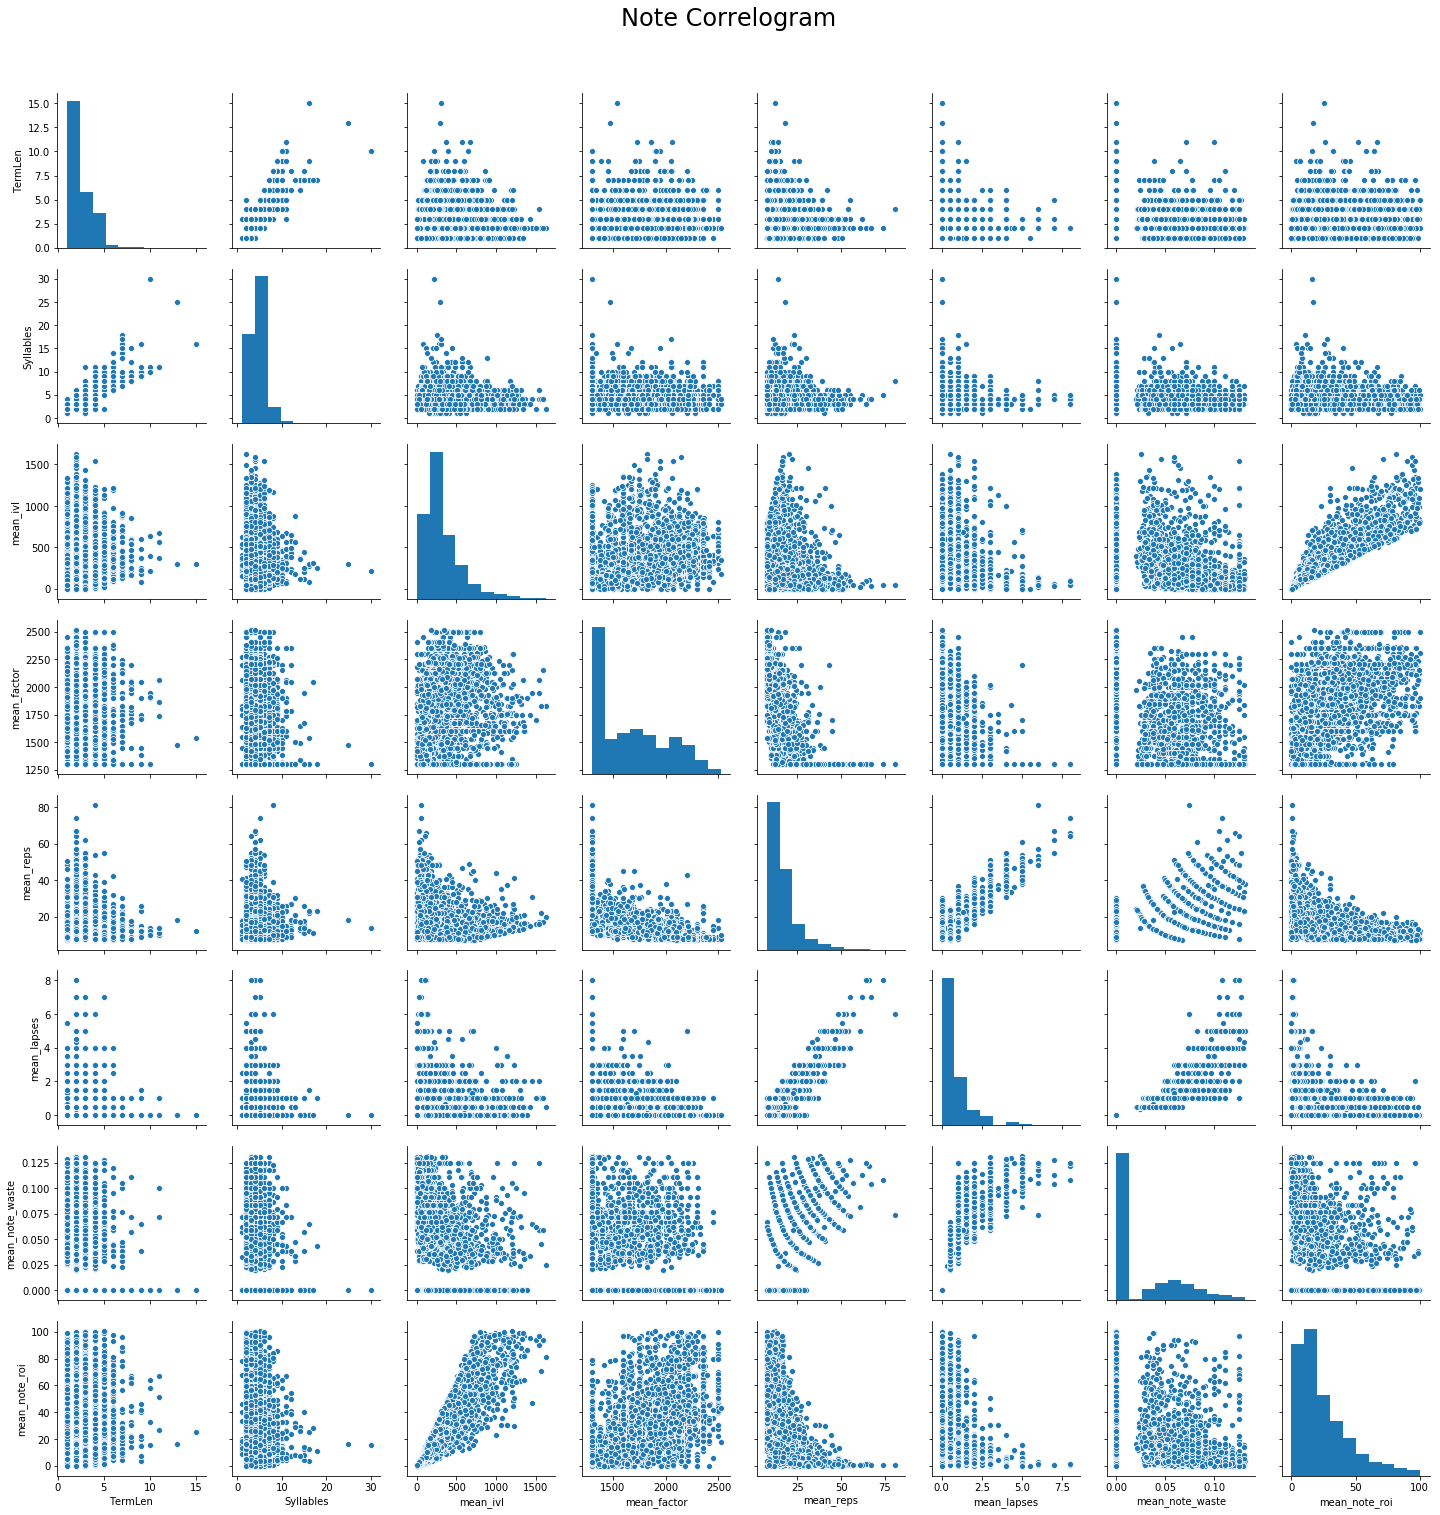

In [112]:
# Basic correlogram
g = sns.pairplot(df_notes_n_corr)
g.fig.suptitle("Note Correlogram", y=1.05, fontsize=24)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1
plt.show()

In [113]:
df_cards_n_corr = df_cards.copy()

df_cards_n_corr = df_cards_n_corr.drop(['cid','nid','CardType_listen','DueDate',
    'CardType_look','CardType_read','CardType_recall','c_ivl_q', 'c_factor_q'], axis=1)

df_cards_n_corr.columns.values

array(['ivl', 'factor', 'reps', 'lapses', 'CardCreated', 'cardtype',
       'waste', 'roi', 'c_suff_reviewed'], dtype=object)

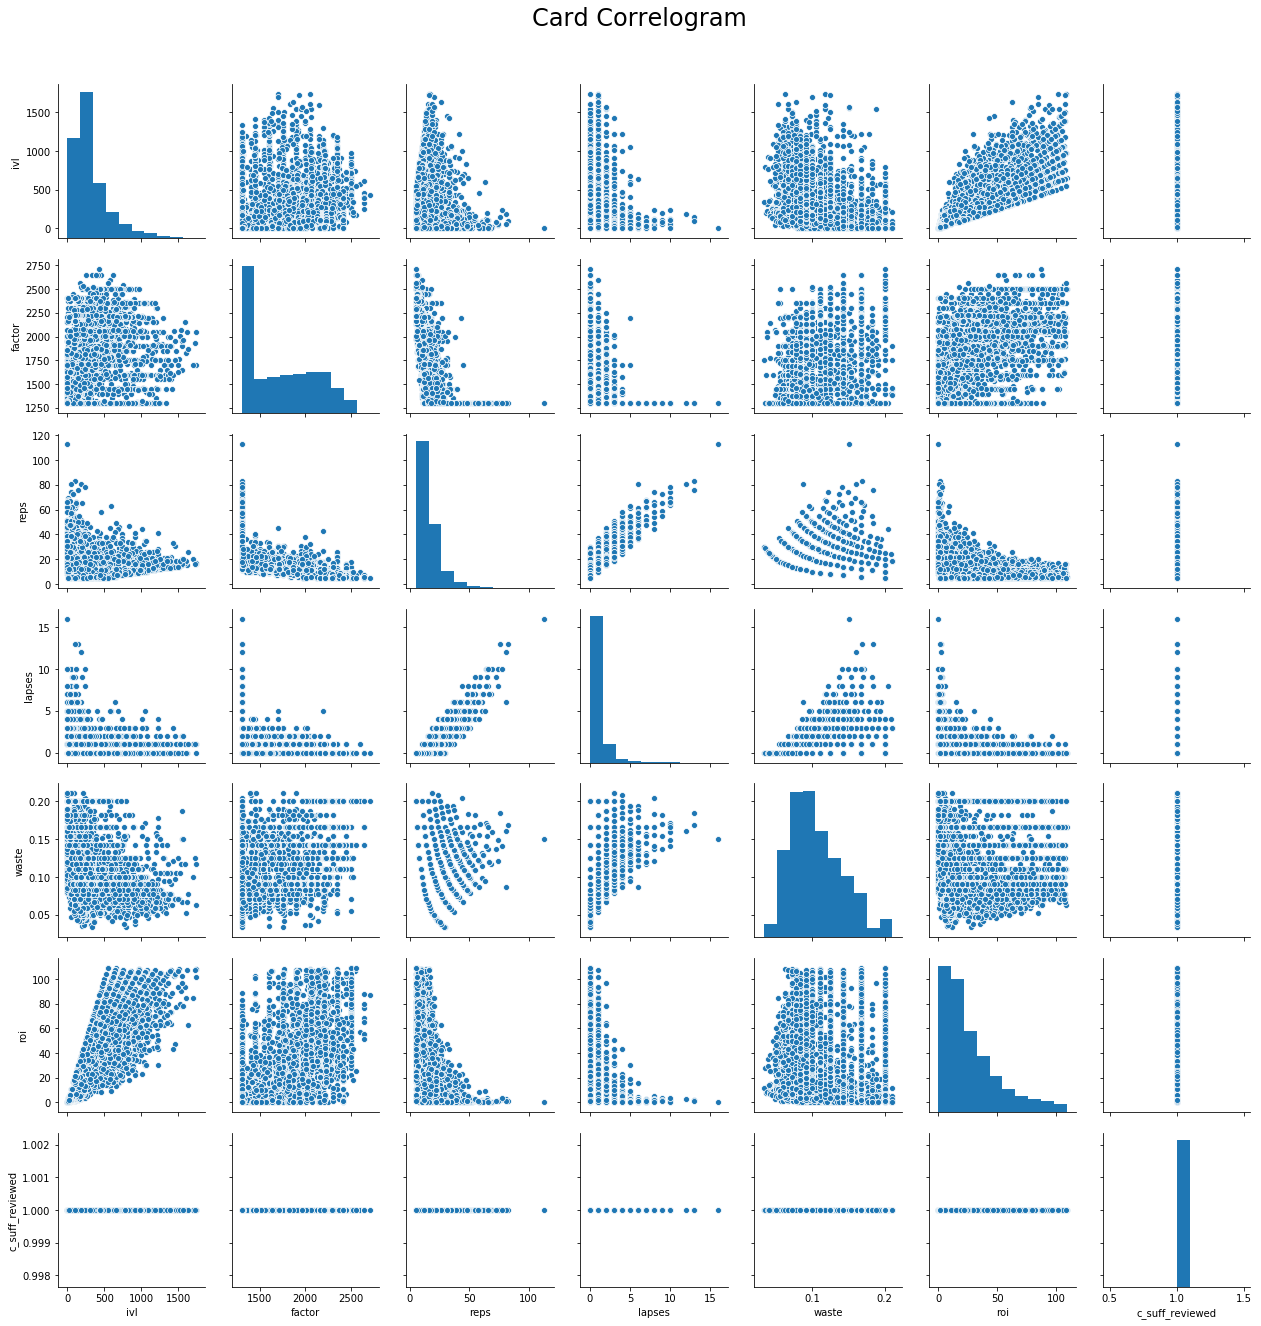

In [114]:
# Basic correlogram
g = sns.pairplot(df_cards_n_corr)
g.fig.suptitle("Card Correlogram", y=1.05, fontsize=24)
# save image out
save_fig_a(image_cnt)
image_cnt = image_cnt + 1
plt.show()

# Intitial Analysis

There appears to be a linear relationship between lapses & reps. It appears that lapses incur a cost of increasing reps. However, this info isn't directly actionable - one cannot simply just 'not forget'. The primary focus is what can be done to minimize lapses while not sacrificing efficiency (long intervals for few reps, and lapses as close as possible to 0).

# Topical Analysis

After doing some basic assessments of the data, we can dig a bit deeper:
- Is there a correlation between words having multiple readings ("yomi") and their forget rate\*?
- Is there a correlation between words having same/similar sounding words and their forget rate\*?
- What might the effect of word length be on memorability? \*\*, \*\*\*

> \* Forget rate can be understand as a multitude of things, such as the ratio between lapses & reps, as well as the raw lapse count, the average interval, and other numbers/ratios to be determined. I will attempt to clarify this in the process.  
\*\* Memorability being loosely correlated with forget rate, where memorability could be understood as a word/term's intrinsic "stickiness" in the brain, as opposed to an individual or collective's capacity to keep words/terms in their head. Sources pending.  
\*\*\* A huge caveat here being that, this dataset has a sample size of 1 (for both student and language), so all observations, interpretations, and understandings must be taken with more than a few grains of salt (and tested further with larger sample sizes, of at least 200 students, and 5 or more languages).

# Further Analysis

For a deeper understanding of what it means to aquire new terminology, the researcher believes it best to conduct analysis on term acquisition by merging multiple vectors (individual cards) of a single term into single entries, where dummy values for each vector (such as review count, lapse count, etc.) are encoded per entry. This would enable inspection and correlation analysis of:
- total reviews per term
- average ratio of reviews per term per vector (look vs hear vs recall vs read)
- where lapses are most likely to occur (per word, per vector, etc.)
- how word length, presence of kanji, katakana, hirgana, or combination thereof, may affect the above counts & ratios

# Further Information

The Spaced Repetition Software (\"SRS\") used for the study of Japanese by student \"A\" is an open souce program called Anki. The algorithm used by it to \"graduate\" (also refered to as \"maturing\") study items (called cards) so that subsequent reviews/practices will be spaced into the future is referred to as SM-2. [Please click here for more information on the SM-2 algorithm used in Anki.]("https://apps.ankiweb.net/docs/manual.html#what-algorithm")